# Denoising Autoencoder

*170615 Masahiro Rikiso*

---

学習リソース：

* [keras公式ブログ](https://blog.keras.io/building-autoencoders-in-keras.html)

In [1]:
from __future__ import print_function, division
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [3]:
from utils import save_model_viz, save_weights, save_hist, plot_hist

In [4]:
RUN_ID = 'dae'

## 1. データの読み込み

In [5]:
from keras.datasets import mnist
(X_train, _), (X_test, _) = mnist.load_data()

X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

## 2. 学習用データの作成

In [6]:
X_train = X_train.reshape((-1, 784)).astype('float')
X_train /= 255.
X_test = X_test.reshape((-1, 784)).astype('float')
X_test /= 255.

X_train.shape, X_test.shape

((60000, 784), (10000, 784))

### add noise to X_train

In [7]:
noise_factor = 0.5
x_train_noisy = X_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_train.shape) 
x_test_noisy = X_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

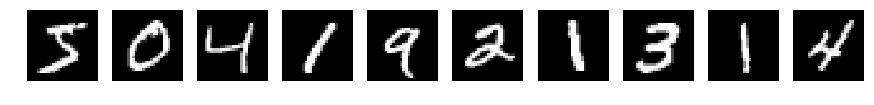

In [8]:
n = 10
_, ax = plt.subplots(ncols=n, figsize=(15, 2))
for i in range(n):
    ax[i].imshow(X_train[i].reshape(28, 28), cmap='gray')
    ax[i].set_axis_off()

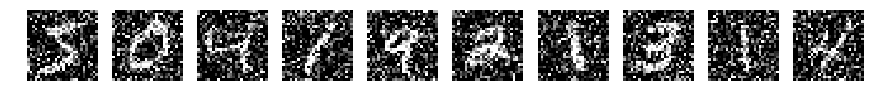

In [9]:
n = 10
_, ax = plt.subplots(ncols=n, figsize=(15, 2))
for i in range(n):
    ax[i].imshow(x_train_noisy[i].reshape(28, 28), cmap='gray')
    ax[i].set_axis_off()

## 3. 機械学習モデルの作成

4layer Denoising Autoencoderを定義します。

Input(784) -- FC(256, ReLU) -- FC(32, ReLU) -- FC(256, ReLU) -- Output(10, Sigmoid)

In [10]:
model = Sequential()
model.add(Dense(256, input_shape=(784,), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(784, activation='sigmoid'))
model.compile(optimizer = 'adam', loss = 'mse')

save_model_viz(RUN_ID, model)

hist = model.fit(x_train_noisy, X_train, epochs=20, batch_size=128,
                 verbose=1, validation_data=(x_test_noisy, X_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 8s - loss: 0.0457 - val_loss: 0.0292
Epoch 2/20
60000/60000 [==============================] - 6s - loss: 0.0269 - val_loss: 0.0246
Epoch 3/20
60000/60000 [==============================] - 7s - loss: 0.0239 - val_loss: 0.0229
Epoch 4/20
60000/60000 [==============================] - 7s - loss: 0.0226 - val_loss: 0.0220
Epoch 5/20
60000/60000 [==============================] - 6s - loss: 0.0218 - val_loss: 0.0213
Epoch 6/20
60000/60000 [==============================] - 7s - loss: 0.0211 - val_loss: 0.0207
Epoch 7/20
60000/60000 [==============================] - 6s - loss: 0.0205 - val_loss: 0.0200
Epoch 8/20
60000/60000 [==============================] - 6s - loss: 0.0199 - val_loss: 0.0197
Epoch 9/20
60000/60000 [==============================] - 7s - loss: 0.0194 - val_loss: 0.0193
Epoch 10/20
60000/60000 [==============================] - 8s - loss: 0.0189 - val_loss: 0.0188

## 4. ノイズ除去性能の確認

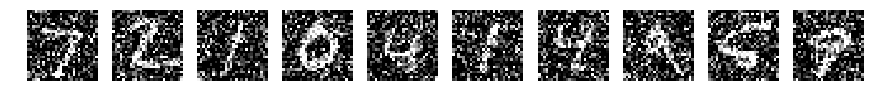

In [11]:
n = 10
_, ax = plt.subplots(ncols=n, figsize=(15, 2))
for i in range(n):
    ax[i].imshow(x_test_noisy[i].reshape(28, 28), cmap='gray')
    ax[i].set_axis_off()

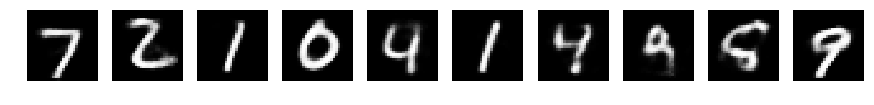

In [12]:
n = 10
_, ax = plt.subplots(ncols=n, figsize=(15, 2))
for i in range(n):
    ax[i].imshow(model.predict(x_test_noisy[i].reshape(1,784)).reshape(28, 28), cmap='gray')
    ax[i].set_axis_off()

<font color='blue' size=5>いい感じですね！！！</font>

## 5. 学習ログとモデルの可視化

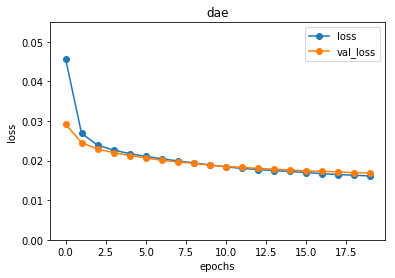

In [13]:
save_weights(RUN_ID, model)
save_hist(RUN_ID, hist)
plot_hist(RUN_ID, acc=False)

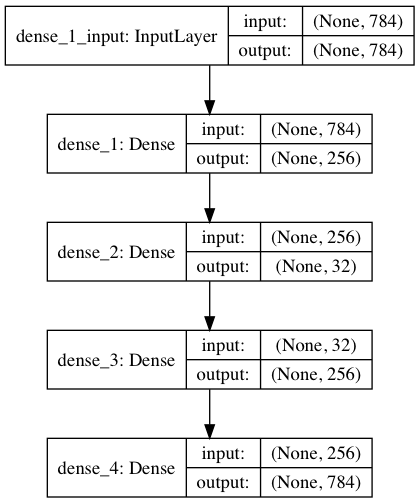

In [14]:
from IPython.display import Image
Image("model/dae_vis.png")